## Machine Learning
Estadistica Descriptiva 20220430 \
Elkin Fernando Ayala \
Big Data y Analitica de Datos - ESEIT

In [2]:
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_gbq
import matplotlib.pyplot as plt

#reinicio de Kernel
%load_ext autoreload 
#Reinicio en carpetas para tomar nuevos cambios
%autoreload 2 

from pathlib import Path
current_dir = Path(".").resolve()
project_dir= Path(current_dir).parent

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
query = '''
SELECT * FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
 WHERE trip_seconds < 45000
 LIMIT 1000'''

df = pd.read_gbq(query)
df.head()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,1635cc78e071c55379ba87d3d275a4f21333d213,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 11:30:00+00:00,2016-09-22 11:45:00+00:00,600,0.8,<NA>,<NA>,<NA>,<NA>,...,0.0,9.25,Credit Card,Chicago Independents,NaN,NaN,None,NaN,NaN,None
1,1e3168900f8090e1bab555b15210f6ad701af327,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 11:45:00+00:00,2016-09-22 12:00:00+00:00,960,7.6,<NA>,<NA>,<NA>,<NA>,...,0.0,21.50,Cash,Chicago Independents,NaN,NaN,None,NaN,NaN,None
2,c620405438b7bfcc6378f885f6aa56d1b8be9369,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 15:00:00+00:00,2016-09-22 15:45:00+00:00,3000,13.2,<NA>,<NA>,<NA>,<NA>,...,0.0,37.00,Cash,Chicago Independents,NaN,NaN,None,NaN,NaN,None
3,c8b56b9c599580efc1e4ffe36ac36cfb7ea85cbd,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 17:15:00+00:00,2016-09-22 17:45:00+00:00,2220,12.2,<NA>,<NA>,<NA>,<NA>,...,4.5,46.58,Credit Card,Chicago Independents,NaN,NaN,None,NaN,NaN,None
4,c876619a0a2869039533144d7105948e9cfc1951,1158f25979ad78fd3dafc867a540ad761b65922c312e61...,2016-09-19 21:00:00+00:00,2016-09-19 21:30:00+00:00,1560,15.6,<NA>,<NA>,<NA>,<NA>,...,4.0,52.40,Credit Card,Sun Taxi,NaN,NaN,None,NaN,NaN,None


In [4]:
# Get only numeric colums
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_df = df.select_dtypes(include=numerics)
num_df.head()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,600,0.8,<NA>,<NA>,<NA>,<NA>,6.75,2.00,0.0,0.0,9.25,NaN,NaN,NaN,NaN
1,960,7.6,<NA>,<NA>,<NA>,<NA>,21.50,0.00,0.0,0.0,21.50,NaN,NaN,NaN,NaN
2,3000,13.2,<NA>,<NA>,<NA>,<NA>,37.00,0.00,0.0,0.0,37.00,NaN,NaN,NaN,NaN
3,2220,12.2,<NA>,<NA>,<NA>,<NA>,35.50,6.08,0.0,4.5,46.58,NaN,NaN,NaN,NaN
4,1560,15.6,<NA>,<NA>,<NA>,<NA>,39.25,8.65,0.0,4.0,52.40,NaN,NaN,NaN,NaN


In [5]:
num_df.describe()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,1000.000000,1000.000000,0,0,0,0,1000.000000,1000.000000,907.0,1000.000000,1000.000000,0.0,0.0,0.0,0.0
mean,827.440000,6.726440,<NA>,<NA>,<NA>,<NA>,13.628910,1.578080,0.0,0.970000,16.376990,NaN,NaN,NaN,NaN
std,803.937998,18.950691,<NA>,<NA>,<NA>,<NA>,13.689976,2.675334,0.0,3.560024,16.965577,NaN,NaN,NaN,NaN
min,0.000000,0.000000,<NA>,<NA>,<NA>,<NA>,0.010000,0.000000,0.0,0.000000,0.010000,NaN,NaN,NaN,NaN
25%,347.500000,1.000000,<NA>,<NA>,<NA>,<NA>,6.000000,0.000000,0.0,0.000000,7.250000,NaN,NaN,NaN,NaN
50%,600.000000,1.900000,<NA>,<NA>,<NA>,<NA>,8.500000,0.000000,0.0,0.000000,10.250000,NaN,NaN,NaN,NaN
75%,960.000000,5.725000,<NA>,<NA>,<NA>,<NA>,14.762500,2.000000,0.0,1.000000,17.500000,NaN,NaN,NaN,NaN
max,6240.000000,195.900000,<NA>,<NA>,<NA>,<NA>,145.000000,20.000000,0.0,72.000000,217.000000,NaN,NaN,NaN,NaN


# 1. Histograma y diagrama de Cajas

## Histograma y Diagrama de Cajas "trip_seconds"

<AxesSubplot:>

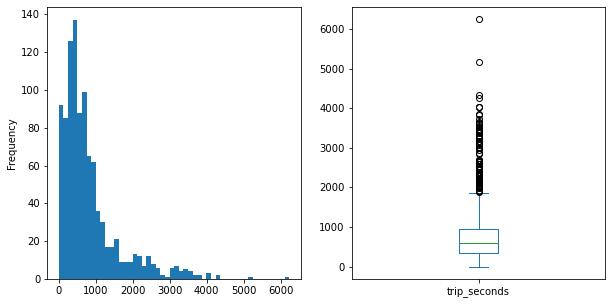

In [17]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
num_df["trip_seconds"].plot(kind="hist", bins=50,  ax=ax[0])
num_df["trip_seconds"].plot(kind="box",             ax=ax[1])

In [ ]:
for graficar_variables, value in dict1.items():
    print(f"Key {key} has value {value}")

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


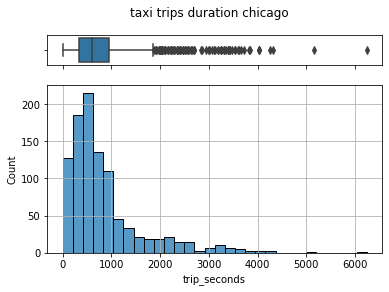

In [8]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["trip_seconds"], ax=ax_box)
sns.histplot(data=num_df, x="trip_seconds", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('taxi trips duration chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-trip-duration-chicago')
#f.savefig(plot_path)

## Histograma y Diagrama de cajas "trip_miles"

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


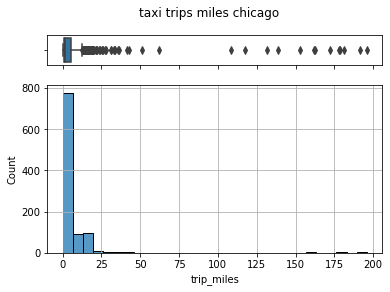

In [12]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["trip_miles"], ax=ax_box)
sns.histplot(data=num_df, x="trip_miles", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('taxi trips miles chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-trip-miles-chicago')
#f.savefig(plot_path)

## Histograma y Diagrama de cajas "fare"

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


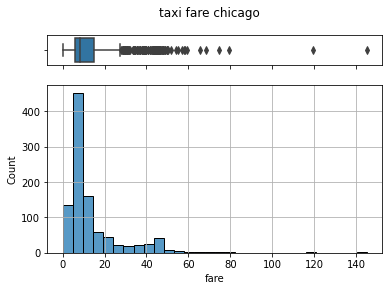

In [18]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["fare"], ax=ax_box)
sns.histplot(data=num_df, x="fare", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('taxi fare chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-fare-chicago')
#f.savefig(plot_path)

## Histograma y Diagrama de cajas "tips"

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


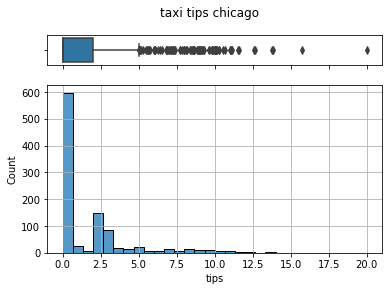

In [15]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["tips"], ax=ax_box)
sns.histplot(data=num_df, x="tips", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('taxi tips chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-tips-chicago')
#f.savefig(plot_path)

## Histograma y Diagrama de cajas "tolls"

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


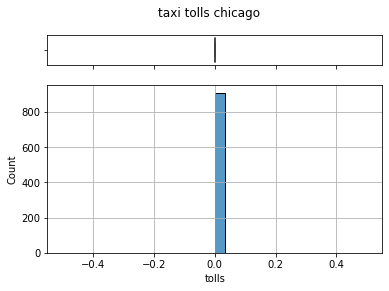

In [16]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["tolls"], ax=ax_box)
sns.histplot(data=num_df, x="tolls", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('taxi tolls chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-tolls-chicago')
#f.savefig(plot_path)

## Histograma y Diagrama de cajas "extras"

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


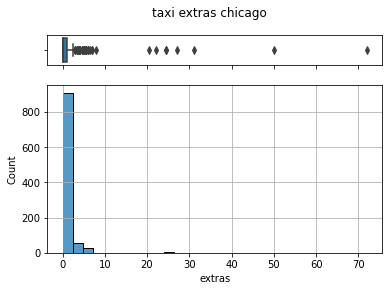

In [20]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["extras"], ax=ax_box)
sns.histplot(data=num_df, x="extras", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('taxi extras chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-extras-chicago')
#f.savefig(plot_path)

## Histograma y Diagrama de cajas "trip_total"

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


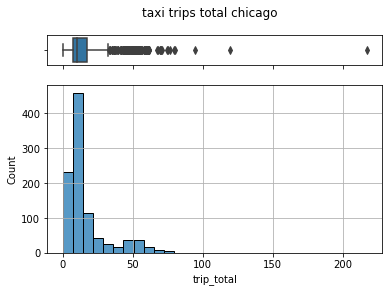

In [21]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["trip_total"], ax=ax_box)
sns.histplot(data=num_df, x="trip_total", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('taxi trips total chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-trip-total-chicago')
#f.savefig(plot_path)

# 2. Correlación y diagramas de dispersión de variables con respecto a trip_seconds

## Correlación y diagrama "trip_seconds" - "trip_miles"

In [24]:
x = 'trip_seconds'
y = 'trip_miles'
num_df[[x,y]].corr()

,trip_seconds,trip_miles
trip_seconds,1.000000,0.388041
trip_miles,0.388041,1.000000


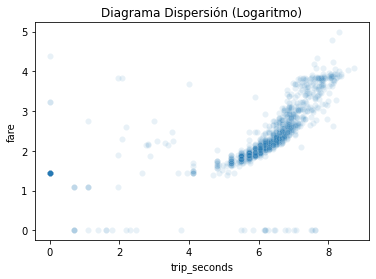

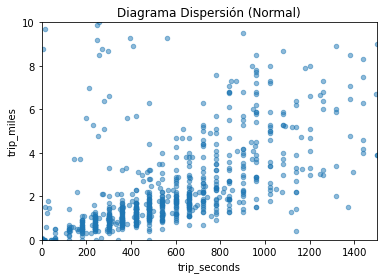

In [43]:
log_x = np.log(num_df[x]+1)
log_y = np.log(num_df[y]+1)

plt.title("Diagrama Dispersión (Logaritmo)")
sns.scatterplot(x=log_x, y=log_y, alpha=0.1);
num_df.plot(kind= 'scatter', x='trip_seconds', y='trip_miles', alpha=0.5);
plt.title("Diagrama Dispersión (Normal)")
#alpha, suaviza valores atipicos para concetrarse sobre los viajes 
plt.xlim(0, 1500)
plt.ylim(0, 10);

## Correlación y diagrama "trip_seconds" - "fare"

In [40]:
x = 'trip_seconds'
y = 'fare'
num_df[[x,y]].corr()

,trip_seconds,fare
trip_seconds,1.000000,0.811545
fare,0.811545,1.000000


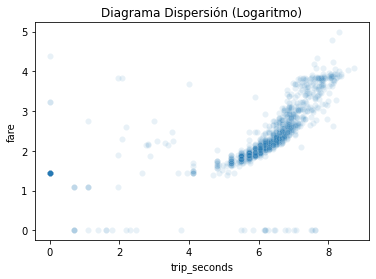

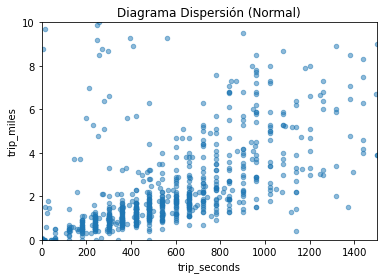

In [45]:
log_x = np.log(num_df[x]+1)
log_y = np.log(num_df[y]+1)

plt.title("Diagrama Dispersión (Logaritmo)")
sns.scatterplot(x=log_x, y=log_y, alpha=0.1);
num_df.plot(kind= 'scatter', x='trip_seconds', y='trip_miles', alpha=0.5);
plt.title("Diagrama Dispersión (Normal)")
#alpha, suaviza valores atipicos para concetrarse sobre los viajes 
plt.xlim(0, 1500)
plt.ylim(0, 10);

## Correlación y diagrama "trip_seconds" - "tips"

In [46]:
x = 'trip_seconds'
y = 'tips'
num_df[[x,y]].corr()

,trip_seconds,tips
trip_seconds,1.000000,0.465293
tips,0.465293,1.000000


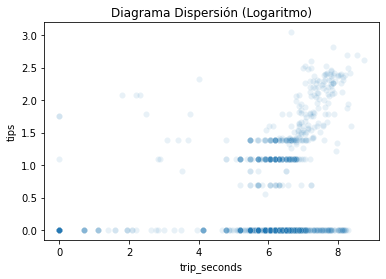

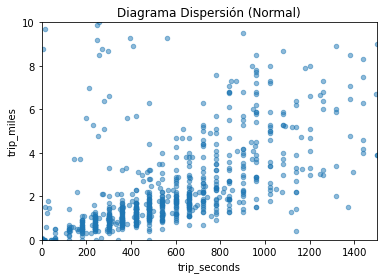

In [58]:
log_x = np.log(num_df[x]+1)
log_y = np.log(num_df[y]+1)


plt.title("Diagrama Dispersión (Logaritmo)")
sns.scatterplot(x=log_x, y=log_y, alpha=0.1);
num_df.plot(kind= 'scatter', x='trip_seconds', y='trip_miles', alpha=0.5);
plt.title("Diagrama Dispersión (Normal)")
#alpha, suaviza valores atipicos para concetrarse sobre los viajes 
plt.xlim(0, 1500)
plt.ylim(0, 10);

## Correlación y diagrama "trip_seconds" - "tolls"

In [59]:
x = 'trip_seconds'
y = 'tolls'
num_df[[x,y]].corr()

,trip_seconds,tolls
trip_seconds,1.0,NaN
tolls,NaN,NaN


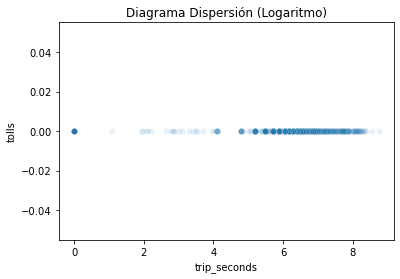

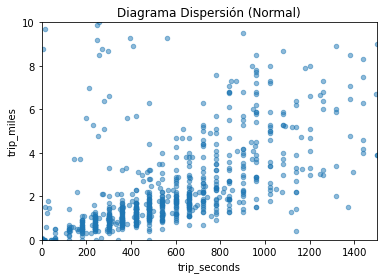

In [60]:
log_x = np.log(num_df[x]+1)
log_y = np.log(num_df[y]+1)


plt.title("Diagrama Dispersión (Logaritmo)")
sns.scatterplot(x=log_x, y=log_y, alpha=0.1);
num_df.plot(kind= 'scatter', x='trip_seconds', y='trip_miles', alpha=0.5);
plt.title("Diagrama Dispersión (Normal)")
#alpha, suaviza valores atipicos para concetrarse sobre los viajes 
plt.xlim(0, 1500)
plt.ylim(0, 10);

## Correlación y diagrama "trip_seconds" - "extras"

In [61]:
x = 'trip_seconds'
y = 'extras'
num_df[[x,y]].corr()

,trip_seconds,extras
trip_seconds,1.000000,0.223759
extras,0.223759,1.000000


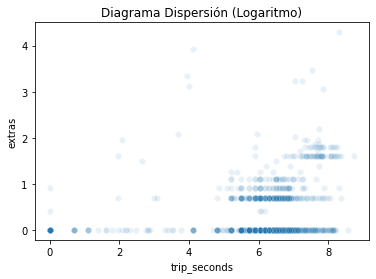

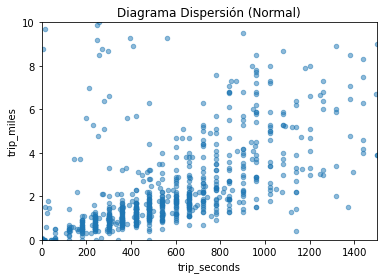

In [62]:
log_x = np.log(num_df[x]+1)
log_y = np.log(num_df[y]+1)


plt.title("Diagrama Dispersión (Logaritmo)")
sns.scatterplot(x=log_x, y=log_y, alpha=0.1);
num_df.plot(kind= 'scatter', x='trip_seconds', y='trip_miles', alpha=0.5);
plt.title("Diagrama Dispersión (Normal)")
#alpha, suaviza valores atipicos para concetrarse sobre los viajes 
plt.xlim(0, 1500)
plt.ylim(0, 10);

## Correlación y diagrama "trip_seconds" - "trip_total"

In [63]:
x = 'trip_seconds'
y = 'trip_total'
num_df[[x,y]].corr()

,trip_seconds,trip_total
trip_seconds,1.000000,0.777201
trip_total,0.777201,1.000000


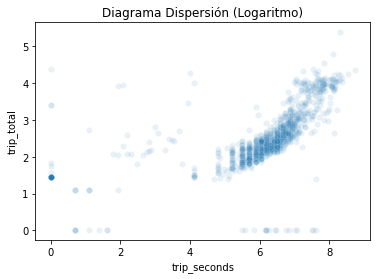

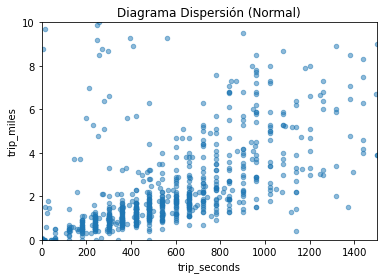

In [64]:
log_x = np.log(num_df[x]+1)
log_y = np.log(num_df[y]+1)


plt.title("Diagrama Dispersión (Logaritmo)")
sns.scatterplot(x=log_x, y=log_y, alpha=0.1);
num_df.plot(kind= 'scatter', x='trip_seconds', y='trip_miles', alpha=0.5);
plt.title("Diagrama Dispersión (Normal)")
#alpha, suaviza valores atipicos para concetrarse sobre los viajes 
plt.xlim(0, 1500)
plt.ylim(0, 10);

# 3. Mapa de calor y scatter Matrix con variables transformadas a logaritmo

In [157]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trip_seconds            1000 non-null   Int64  
 1   trip_miles              1000 non-null   float64
 2   pickup_census_tract     0 non-null      Int64  
 3   dropoff_census_tract    0 non-null      Int64  
 4   pickup_community_area   0 non-null      Int64  
 5   dropoff_community_area  0 non-null      Int64  
 6   fare                    1000 non-null   float64
 7   tips                    1000 non-null   float64
 8   tolls                   907 non-null    float64
 9   extras                  1000 non-null   float64
 10  trip_total              1000 non-null   float64
 11  pickup_latitude         0 non-null      float64
 12  pickup_longitude        0 non-null      float64
 13  dropoff_latitude        0 non-null      float64
 14  dropoff_longitude       0 non-null      f

In [158]:
##Asignación de variables
a= 'trip_total'
b='trip_miles'
c='trip_seconds'
d= 'tips'
e= 'fare'
f= 'extras'
##Conversión de valores en su escala normal
num_df[[a,b,c,d,e,f]]
num_df[[a,b,c,d,e,f]].corr()

##dataframe con columnas especificas
log_num_df = pd.DataFrame(
    columns=[a,b,c,d,e,f]
)
##Logaritmo de columnas
log_a = np.log(num_df[[a]]+1)
log_b = np.log(num_df[[b]]+1)
log_c = np.log(num_df[[c]]+1)
log_d = np.log(num_df[[d]]+1)
log_e = np.log(num_df[[e]]+1)
log_f = np.log(num_df[[f]]+1)

##asignacion de logaritmo a columnas
log_num_df[a] = log_a
log_num_df[b] = log_b
log_num_df[c] = log_c
log_num_df[d] = log_d
log_num_df[e] = log_e
log_num_df[f] = log_f
##Correlacion con logaritmo
log_num_df.corr()

,trip_total,trip_miles,tips,fare,extras
trip_total,1.000000,0.702480,0.516821,0.959970,0.476833
trip_miles,0.702480,1.000000,0.230533,0.741938,0.344184
tips,0.516821,0.230533,1.000000,0.369492,0.235966
fare,0.959970,0.741938,0.369492,1.000000,0.372694
extras,0.476833,0.344184,0.235966,0.372694,1.000000


In [184]:
log_num_df.head() ##¿Por que en la correlación no me muestra la variable "trip_seconds" y tampoco en el mapa de calor?

,trip_total,trip_miles,trip_seconds,tips,fare,extras
0,2.327278,0.587787,6.398595,1.098612,2.047693,0.000000
1,3.113515,2.151762,6.867974,0.000000,3.113515,0.000000
2,3.637586,2.653242,8.006701,0.000000,3.637586,0.000000
3,3.862413,2.580217,7.705713,1.957274,3.597312,1.704748
4,3.977811,2.809403,7.353082,2.266958,3.695110,1.609438


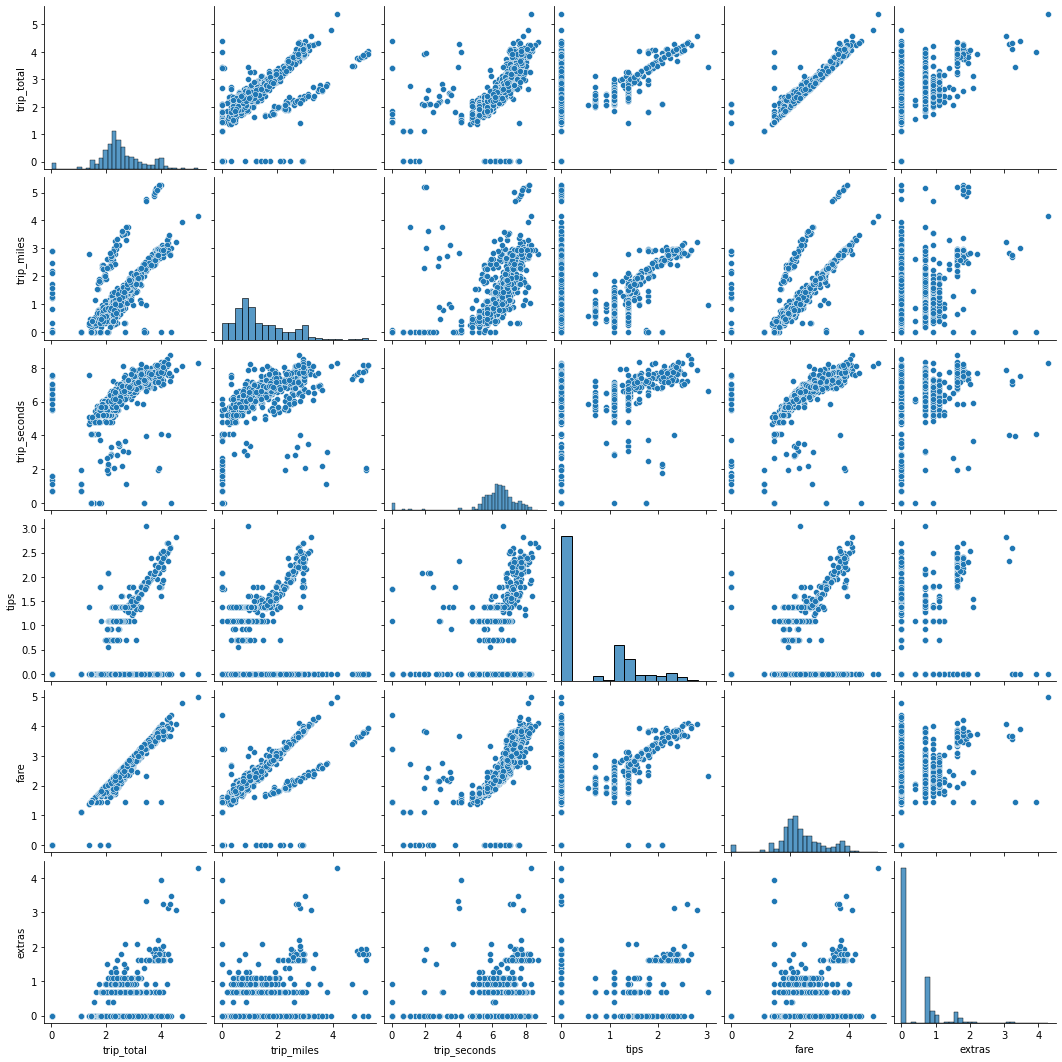

In [186]:
##ScatterMatrix
columnas = ['trip_total','trip_miles','trip_seconds' , 'tips', 'fare' ,'extras']
sns.pairplot(data=log_num_df[columnas]);

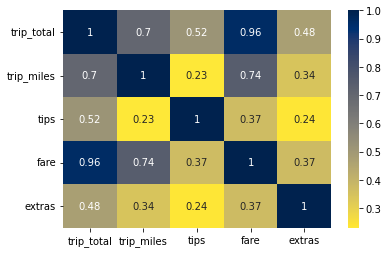

In [160]:
##HeatMap
correlations = log_num_df[columnas].corr()
sns.heatmap(correlations, cmap='cividis_r', annot=True); #Spectral_r

# 4. Estudio de correlaciones con Standard scaler y MinMax Scaler

In [152]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Min Max Scaler

In [177]:
logminmax_scaler = MinMaxScaler().fit(log_num_df[columnas])
logdata_min_max_scaled = minmax_scaler.transform(log_num_df[columnas])

In [178]:
lognum_df_minmax_scaled = pd.DataFrame(
    columns=log_num_df[columnas].columns, 
    data = logdata_min_max_scaled)
lognum_df_minmax_scaled.head()

,trip_total,trip_miles,trip_seconds,tips,fare,extras
0,0.431167,0.111266,0.732197,0.360849,0.409707,0.000000
1,0.577456,0.407323,0.785909,0.000000,0.624001,0.000000
2,0.674966,0.502251,0.916214,0.000000,0.729370,0.000000
3,0.716798,0.488428,0.881772,0.642884,0.721273,0.397335
4,0.738269,0.531812,0.841420,0.744602,0.740936,0.375120


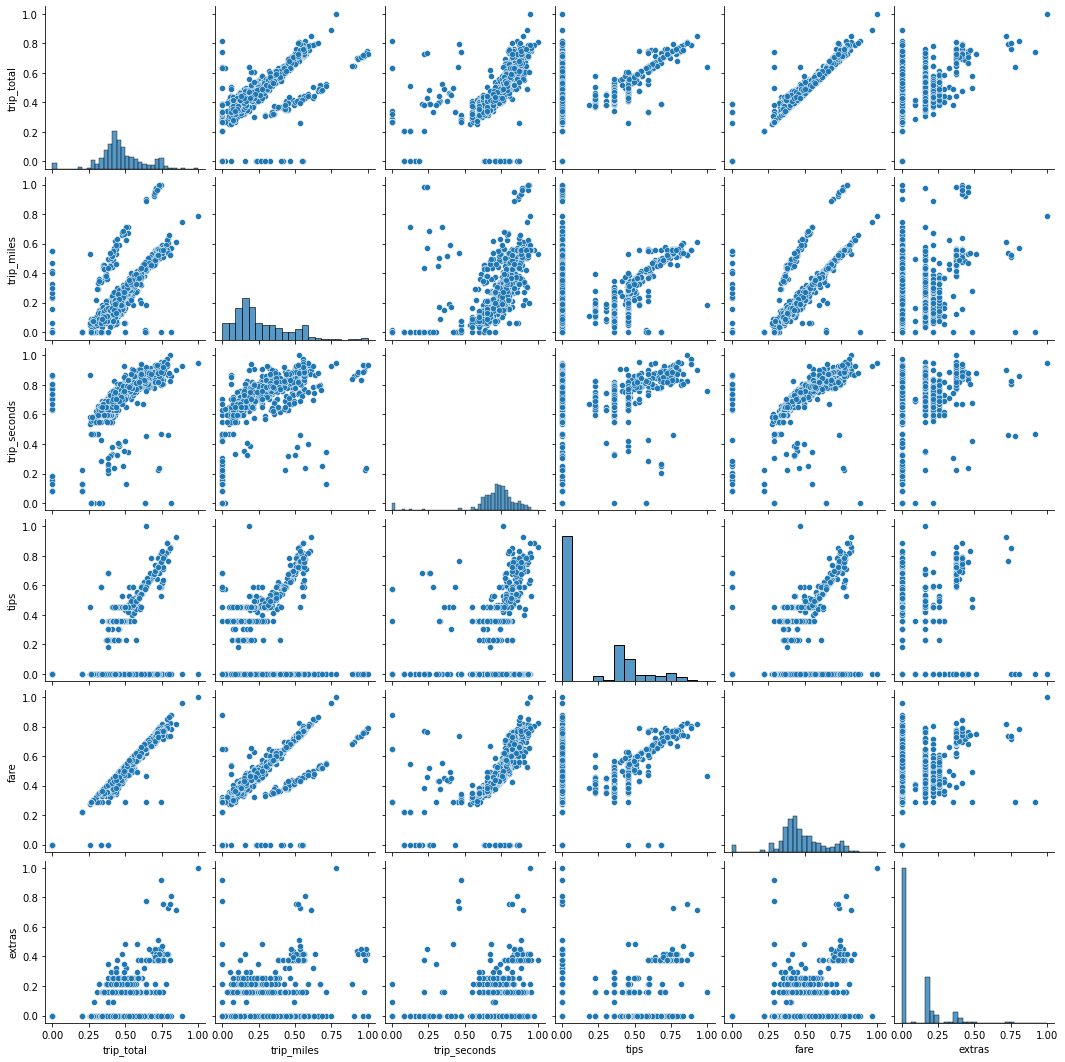

In [197]:
##ScatterMatrix
columnas = ['trip_total','trip_miles','trip_seconds' , 'tips', 'fare' ,'extras']
sns.pairplot(data=lognum_df_minmax_scaled[columnas]);

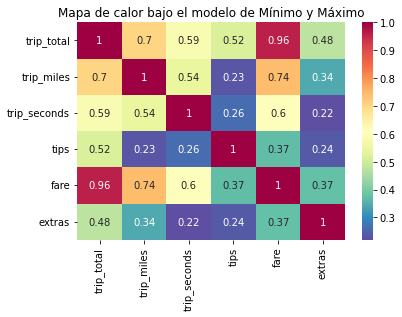

In [193]:
##HeatMap
correlations = lognum_df_minmax_scaled[columnas].corr()
sns.heatmap(correlations, cmap='Spectral_r', annot=True); #Spectral_r
plt.title("Mapa de calor bajo el modelo de Mínimo y Máximo");

## Standar Scaler

In [179]:
logstandard_scaler = StandardScaler().fit(log_num_df[columnas])
logdata_standard_scaled = standard_scaler.transform(log_num_df[columnas])

In [180]:
lognum_df_standard_scaled = pd.DataFrame(
    columns=log_num_df[columnas].columns, 
    data = logdata_standard_scaled)
lognum_df_standard_scaled.head()

,trip_total,trip_miles,trip_seconds,tips,fare,extras
0,-0.253508,-0.801507,0.186215,0.656155,-0.411266,-0.634985
1,0.729560,0.823728,0.480541,-0.752117,0.944124,-0.634985
2,1.384829,1.344851,1.194582,-0.752117,1.610576,-0.634985
3,1.665940,1.268965,1.005847,1.756843,1.559361,2.203760
4,1.810227,1.507128,0.784729,2.153815,1.683729,2.045050


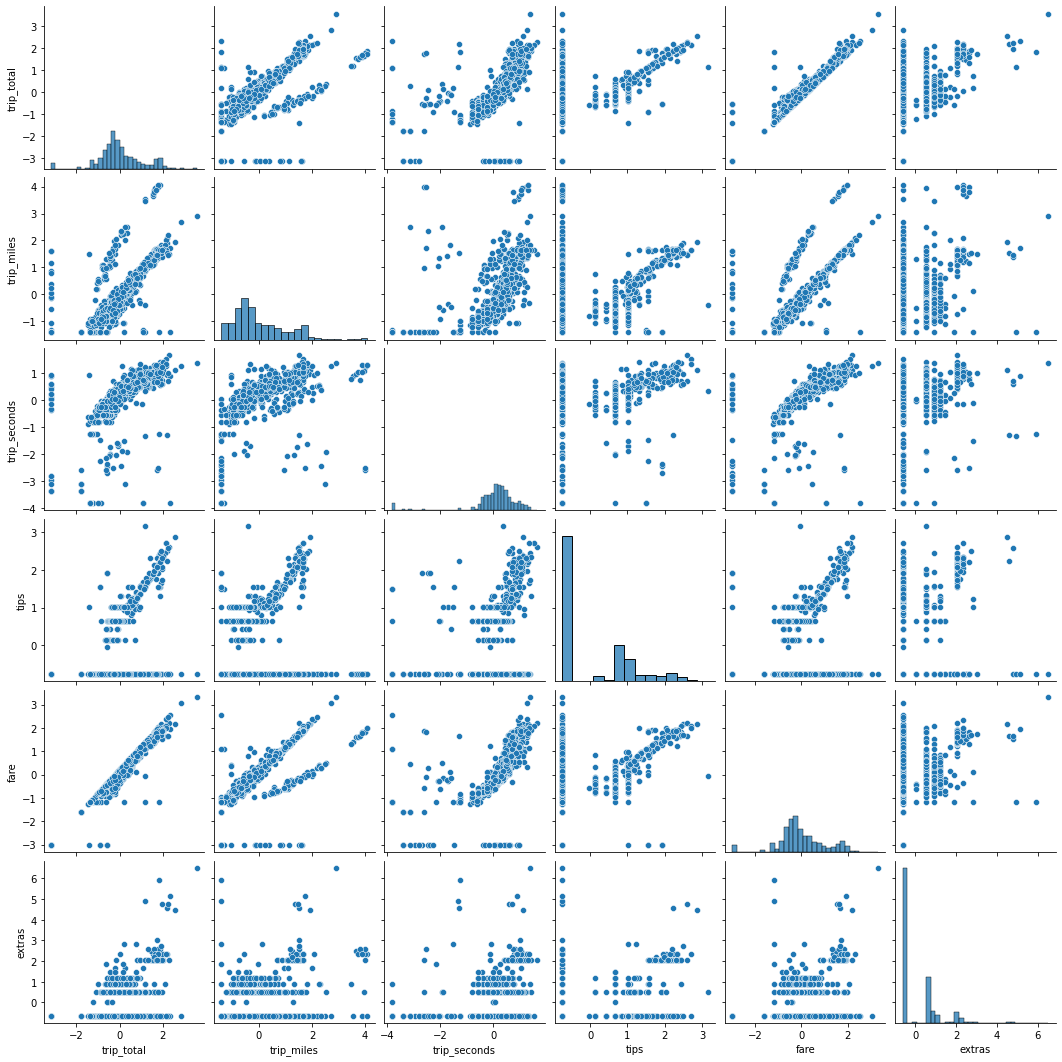

In [187]:
##ScatterMatrix
columnas = ['trip_total','trip_miles','trip_seconds' , 'tips', 'fare' ,'extras']
sns.pairplot(data=lognum_df_standard_scaled[columnas])

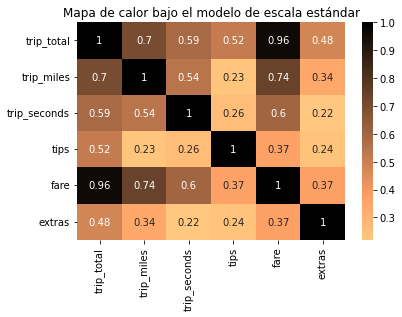

In [192]:
##HeatMap
correlations = lognum_df_standard_scaled[columnas].corr()
sns.heatmap(correlations, cmap='copper_r', annot=True); #Spectral_r
plt.title("Mapa de calor bajo el modelo de escala estándar");

# Temas Vistos en Clase

**LOG TRANSFORM**

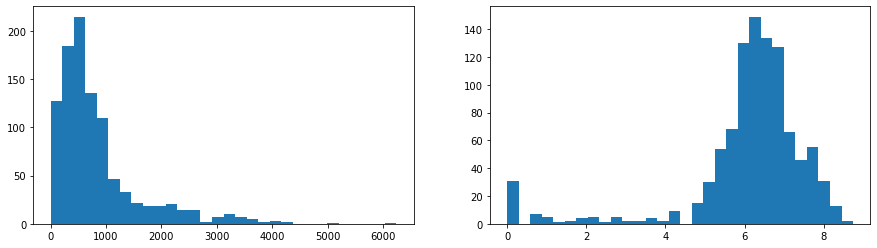

In [71]:
x = num_df['trip_seconds']
log_x = np.log(x+1)

f, ax = plt.subplots(1,2, figsize=(15,4))

ax[0].hist(x, bins=30)
ax[1].hist(log_x, bins=30);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trip_seconds'>

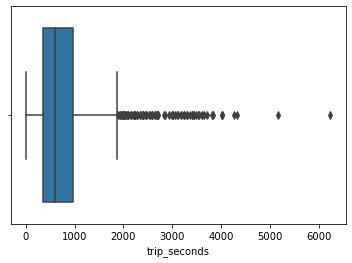

In [72]:
sns.boxplot(x)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trip_seconds'>

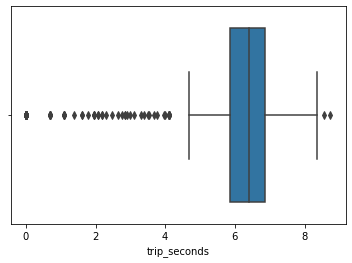

In [73]:
sns.boxplot(log_x)

In [74]:
#log_x.describe()
np.exp(log_x.mean())

446.58359990923947

(0.0, 10.0)

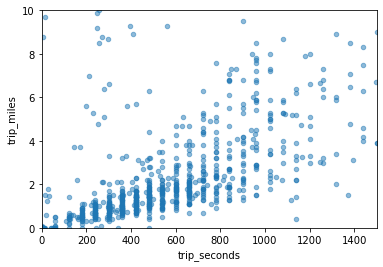

In [75]:
num_df.plot(kind= 'scatter', x='trip_seconds', y='trip_miles', alpha=0.5);
#alpha, suaviza valores atipicos para concetrarse sobre los viajes 
plt.xlim(0, 1500)
plt.ylim(0, 10)

In [ ]:
x='trip_seconds'
y='trip_miles'
num_df[[x,y]].corr()

,trip_seconds,trip_miles
trip_seconds,1.000000,0.388041
trip_miles,0.388041,1.000000


<AxesSubplot:xlabel='trip_seconds', ylabel='trip_miles'>

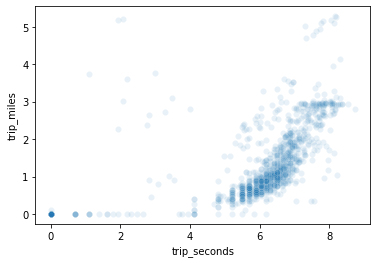

In [ ]:
log_x = np.log(num_df[x]+1)
log_y = np.log(num_df[y]+1)

sns.scatterplot(x=log_x, y=log_y, alpha=0.1)

In [100]:
log_num_df = pd.DataFrame(
    columns=[x,y]
)

log_num_df[x] = log_x
log_num_df[y] = log_y

log_num_df.corr()
#Con la variable segundos puedo describir en un 54.4% los datos de trip_miles

,trip_seconds,trip_miles
trip_seconds,1.000000,0.543457
trip_miles,0.543457,1.000000


**Many Dimensions**

* Scatter Matrix

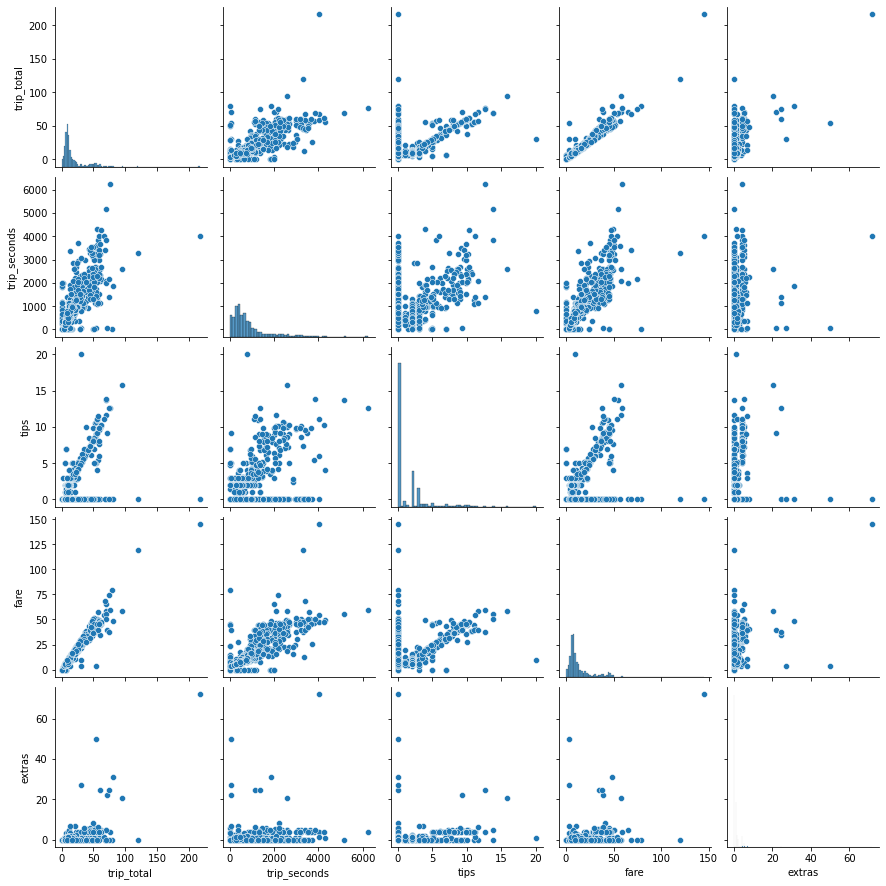

In [102]:
cols = ['trip_total', 'trip_seconds', 'tips', 'fare' ,'extras']
sns.pairplot(data=num_df[cols])

<AxesSubplot:>

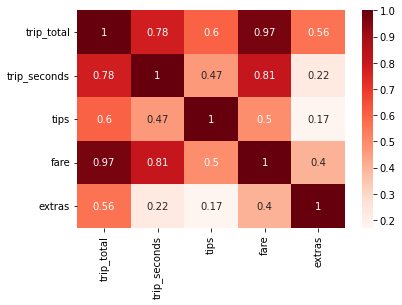

In [106]:
correlations = num_df[cols].corr()

sns.heatmap(correlations, cmap='Reds', annot=True)

**Manipulating Data**

*Escalamiento de datos* \
Scaled \
       --> MinMax Scaler *Convertir en una escala porcentual* \
       --> Standar Scaler

**MinMax Scaled**

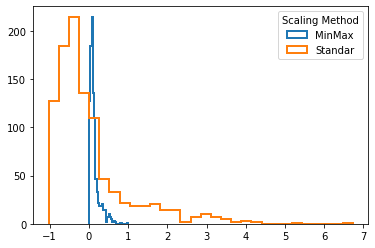

In [141]:
x = num_df['trip_seconds']
x_min = num_df['trip_seconds'].min()
x_max = num_df['trip_seconds'].max()

x_mean = x.mean()
x_std = x.std()

x_minmax_scaled = ((x - x_min) / (x_max - x_min))
x_std_scaled    = (x - x_mean)/x_std 

plt.hist(x_minmax_scaled, bins = 30, label='MinMax', histtype='step', lw = 2 )
plt.hist(x_std_scaled, bins = 30, label='Standar', histtype='step', lw = 2)
plt.legend(title='Scaling Method');

**standar Scaled** 
\
(Teorema del limite central) -- la comparación se hace con el punto central de los datos

In [146]:
minmax_scaler = MinMaxScaler().fit(num_df[cols])
data_min_max_scaled = minmax_scaler.transform(num_df[cols])

In [147]:
num_df_minmax_scaled = pd.DataFrame(
    columns=num_df[cols].columns, 
    data = data_min_max_scaled)
num_df_minmax_scaled.head()

,trip_total,trip_seconds,tips,fare,extras
0,0.042583,0.096154,0.1000,0.046486,0.000000
1,0.099037,0.153846,0.0000,0.148217,0.000000
2,0.170469,0.480769,0.0000,0.255121,0.000000
3,0.214618,0.355769,0.3040,0.244776,0.062500
4,0.241440,0.250000,0.4325,0.270639,0.055556


In [148]:
standard_scaler = StandardScaler().fit(num_df[cols])
data_standard_scaled = standard_scaler.transform(num_df[cols])

In [149]:
num_df_standard_scaled = pd.DataFrame(
    columns=num_df[cols].columns, 
    data = data_standard_scaled)
num_df_standard_scaled.head()

,trip_total,trip_seconds,tips,fare,extras
0,-0.420296,-0.283049,0.157786,-0.502729,-0.272606
1,0.302116,0.164971,-0.590158,0.575241,-0.272606
2,1.216188,2.703750,-0.590158,1.708022,-0.272606
3,1.781143,1.733040,1.683593,1.598398,0.992062
4,2.124362,0.911670,2.644701,1.872458,0.851544
